Project \#2
================

# Homophobia in Germany

Made by Liskonozhenko, Poroshina, Scherbakova, Vasyukova BSC-193C

## Data and RQ

For this project, we use the data from 9th round of ESS in Germany.

**Research question**: what social factors influence homophobia in
Germany?

## Literature review

In our second group project, we would like to explore the factors that
can influence whether a person is homophobic or not. There are several
studies that explore various factors that can predict homophobia. For
example, in the study by Basow & Johnson (2000) were examined predictors
of homophobia among female college students. The authors investigated
how self-esteem, self-discrepancy, gender-attribute importance, gender
role attitudes, authoritarian attitudes, and extent of contact with LGBT
persons affect homophobia. The study was conducted among students of a
private college of liberal arts; there were 71 respondents in total.
Students completed several questionnaires related to the topic of
predictors that were investigated in the study. The researchers then
performed a correlational analysis. The results of the analysis showed
that the highest correlations with homophobia were in right-wing
authoritarian views, belief in the egalitarianism of gender roles, the
extent of contact with LGBT persons, and the importance of feminine
attributes to participant’s femininity. However, the only significant
predictor was adherence to right-wing authoritarian attitudes.

Another study (Nagoshi, 2008) is also dedicated to finding the
predictors of homophobia and transphobia among college students (157 men
and 153 women). This time both male and female students were asked to
complete the questionnaire about their attitude towards LGBT community
and trans people. Students also completed questionnaires which then
helped to assess their political preferences, religion, propensity to
aggression. The correlation analysis revealed that there is a positive
relation between homophobia and radical right authorism, sexism and
religious fundamentalism.

There is also a relationship between LGBT acceptance and education
levels. An article by Ohlander, Batalova & Treas (2005) found that
people with at least a high school education and higher were more likely
to be tolerant of LGBT people. Whereas people with no high school
education were more likely to show strong intolerance towards the LGBT
community. The study was conducted on the basis of data from the annual
GSS survey (1988-1994), and the sample consisted of 2733 observations.

Another article by Ying, Xie, Minggang, Peng (2017) examines the effects
of religion an exposure to internet information on attitudes towards
homosexuality in China. The author used data from the Chinese General
Social Surveys 2013. The sample included 380 observations from the
CGSS2013. The survey checked the attitude towards LGBT through the
question “What do you generally think about same-sex sexual behaviors?”.
Responses to the question were coded on a 1-5 scale where 1-always wrong
and 5-always right. The internet usage was checked by the question
whether the respondent uses the internet as the main source of
information. Block about religion contained questions about confession
the respondent belonged to. The analysis revealed that people who use
internet as main sourse oh information are less likely to give answer
“always wrong” to the question about normality of homosexual
relationships compared to respondents who prefer other sourses of
information. Also, only Muslim grout showed significant effect on
attitude towards homosexuality. Muslim people are more likely to give
answer “always wrong” to the question about normality of homosexual
relationships.

So, after reviewing several studies of various factors influencing
people’s attitudes towards LGBT rights, we would like to find out if
there is any correlation between these factors and attitudes towards
LGBT rights in Germany. We investigate whether gender, education,
religiosity, and political preferences affect people’s attitudes towards
LGBT rights.

**Loading packages and data**

In [1]:
options(warn = -1)
library(base)
suppressPackageStartupMessages(library(car))
library(foreign)
library(dplyr, warn.conflicts=FALSE)
library(ggplot2)
suppressPackageStartupMessages(library(stargazer))

In [2]:

data = read.spss("./data/ESS9e03_1.sav",
                    to.data.frame=TRUE)
var.labels <- attr(data, "variable.labels")
dd <- data.frame(names(var.labels), var.labels)

ess1 <- filter(data, cntry == "Germany")

## Used variables

Dependent variable: freehms -\> freegays (Gays and lesbians free to live
life as they wish)

Independent variables: lrscale -\> left_right (left or right political
views), rlgdgr -\> religiosity (How religious are you)

Control variables: gndr -\> gender (Gender), eisced -\> education
(Highest level of education), age (Age)

## Data manipulation

To predict the homophobia level with logit model, we need to make it
binary. So, we excluded the unsure level, omitting only 140
observations. Agree are 0, disagree are 1 in the new encoding, so that 1
is for homophobic attitudes, and 0 for non-homophobic.

In [3]:
essger <- filter(ess1, freehms != "Neither agree nor disagree")

essger$freegays <- ifelse(essger$freehms == "Agree strongly" | essger$freehms == "Agree", 0, 1)

In [4]:
ess <- dplyr :: select(essger, freegays, gndr, lrscale, rlgdgr, eisced, agea)

There are too many levels in existing education variable. We recoded
them to get only 3 levels - primary, secondary and higher education (+
other and no education, which were not present in Germany).

In [5]:
levels(ess$eisced)

[1] "Not possible to harmonise into ES-ISCED"            
[2] "ES-ISCED I , less than lower secondary"             
[3] "ES-ISCED II, lower secondary"                       
[4] "ES-ISCED IIIb, lower tier upper secondary"          
[5] "ES-ISCED IIIa, upper tier upper secondary"          
[6] "ES-ISCED IV, advanced vocational, sub-degree"       
[7] "ES-ISCED V1, lower tertiary education, BA level"    
[8] "ES-ISCED V2, higher tertiary education, >= MA level"
[9] "Other"

In [6]:
ess$edu1[ess$eisced == "ES-ISCED I , less than lower secondary" | ess$eisced == "ES-ISCED II, lower secondary"] <- "primary"

ess$edu1[ess$eisced == "ES-ISCED IIIb, lower tier upper secondary" | ess$eisced == "ES-ISCED IIIa, upper tier upper secondary" | ess$eisced == "ES-ISCED IV, advanced vocational, sub-degree"] <- "secondary"

ess$edu1[ess$eisced == "ES-ISCED V1, lower tertiary education, BA level" | ess$eisced == "ES-ISCED V2, higher tertiary education, >= MA level"] <- "higher"

ess$edu1[ess$eisced == "Other"] <- "other"

ess$edu1[ess$eisced == "Not possible to harmonise into ES-ISCED"] <- "no"

Education also has to be factor variable. And, it was releveled to have
primary education as a reference in the model.

In [7]:
ess$edu2 <- as.factor(ess$edu1)
levels(ess$edu2)

[1] "higher"    "primary"   "secondary"

In [8]:
ess$edu <- relevel(ess$edu2, ref = "primary")
levels(ess$edu)

[1] "primary"   "higher"    "secondary"

In [9]:
ess$age <- as.numeric(as.character(ess$agea))

In [10]:
ess <- rename(ess, religiosity = rlgdgr)
ess <- rename(ess, left_right = lrscale)
ess <- rename(ess, gender = gndr)
ess <- rename(ess, education = edu)

The religiosity, political views, gender and education variables were
renamed to the more readable names.

## Descriptive statistics

### Gender

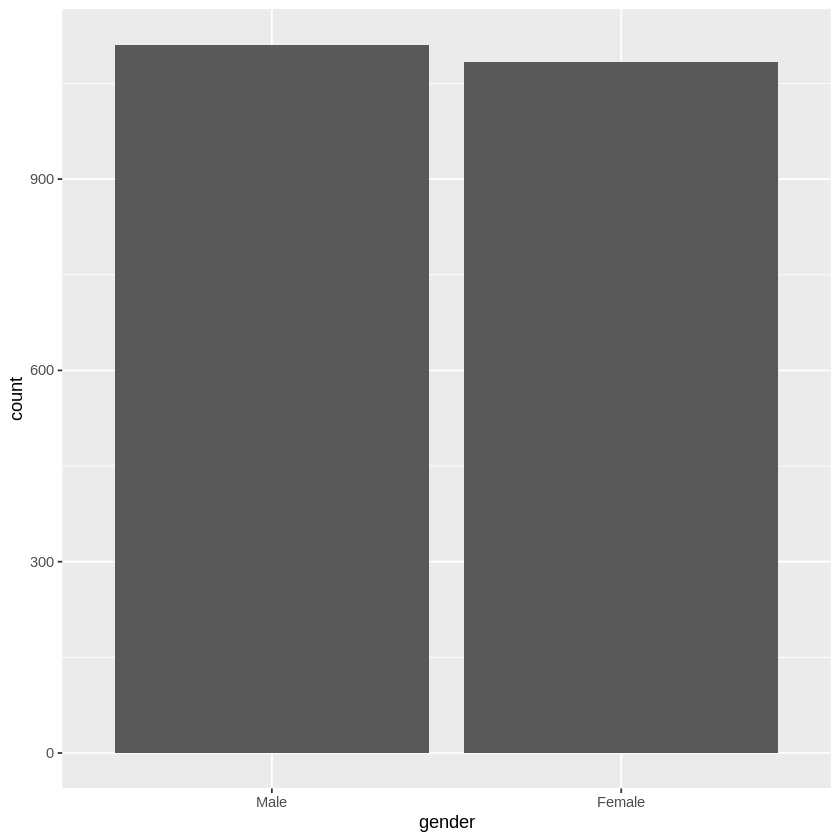

In [11]:
ggplot(data = ess, aes(x = gender)) +
  geom_bar(stat = "count")

The proportions of males and females in the sample are approximately the
same, but there are slightly more males.

### Age

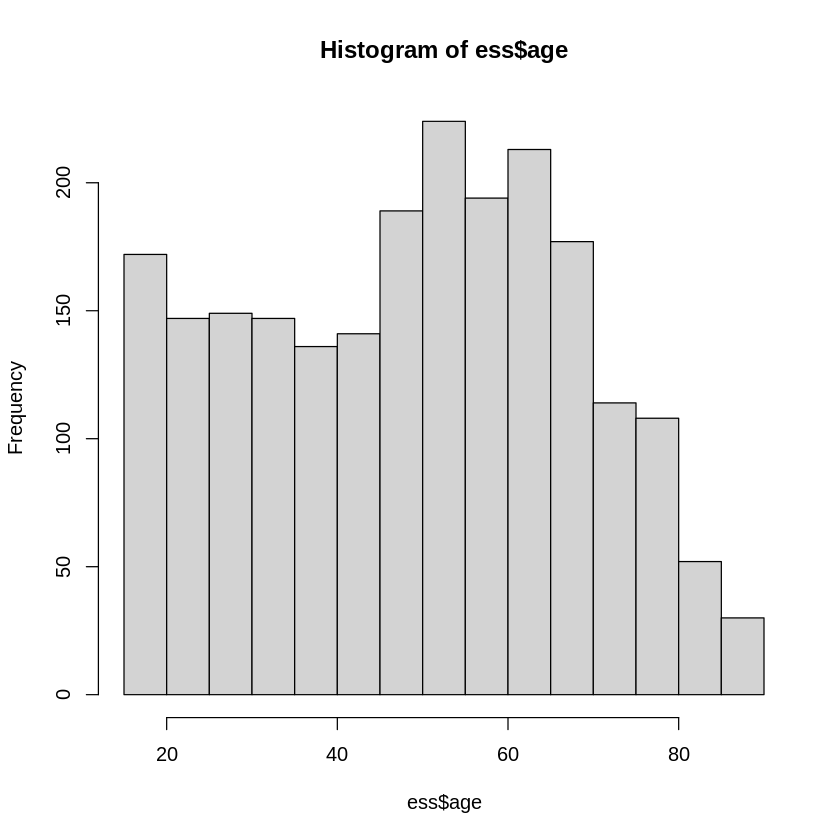

In [12]:
hist(ess$age)

In [13]:
shapiro.test(ess$age)


	Shapiro-Wilk normality test

data:  ess$age
W = 0.97201, p-value < 2.2e-16


As we can see from histogram and the test, the data is not distributed
normally for age variable. There are more older people than younger.

### Religion

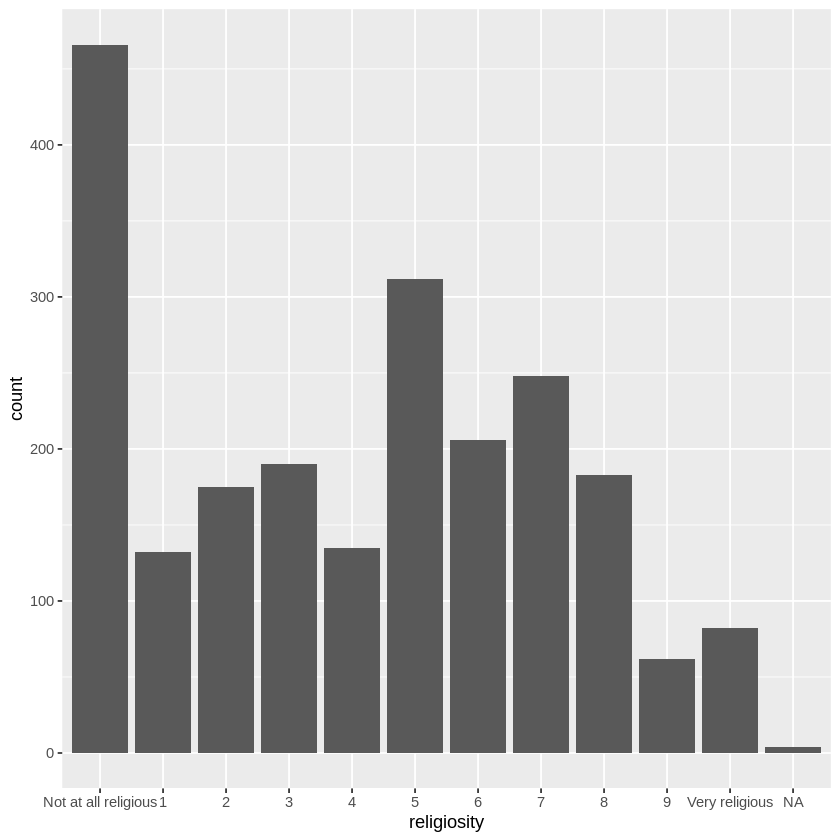

In [14]:
ggplot(data = ess, aes(x = religiosity)) +
  geom_bar(stat = "count")

The religious variable is also not distributed normally. There is a huge
share of people who are not religious at all, smaller share is for
middle and the smallest share is for very religious people.

### Education

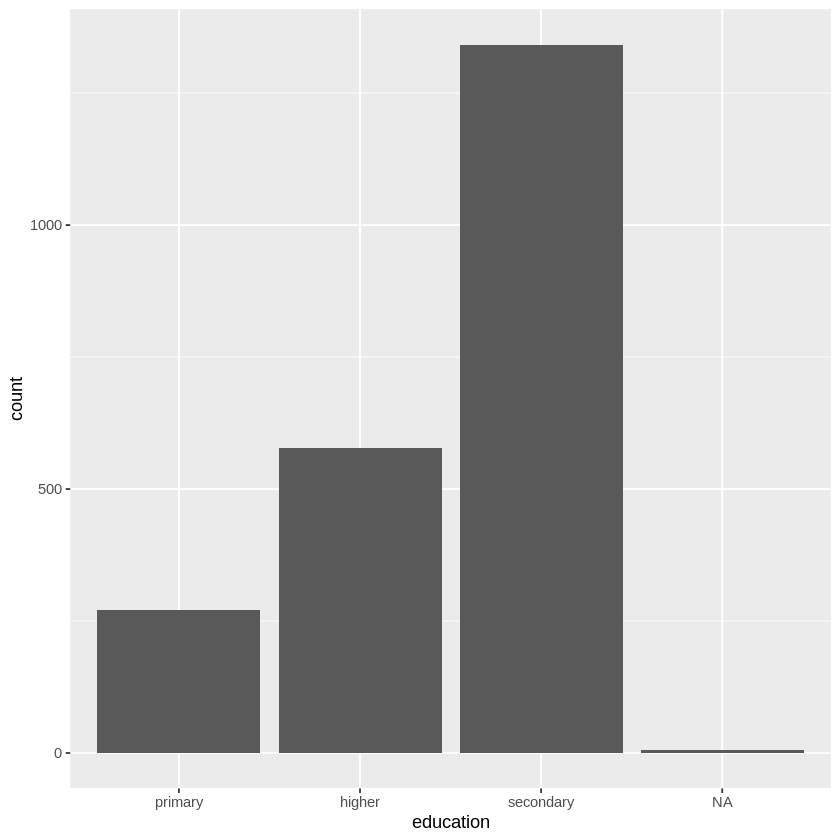

In [15]:
ggplot(data = ess, aes(x = education)) +
  geom_bar(stat = "count")

The biggest proportion of people has secondary education, much less -
higher and primary.

### Left-right scale

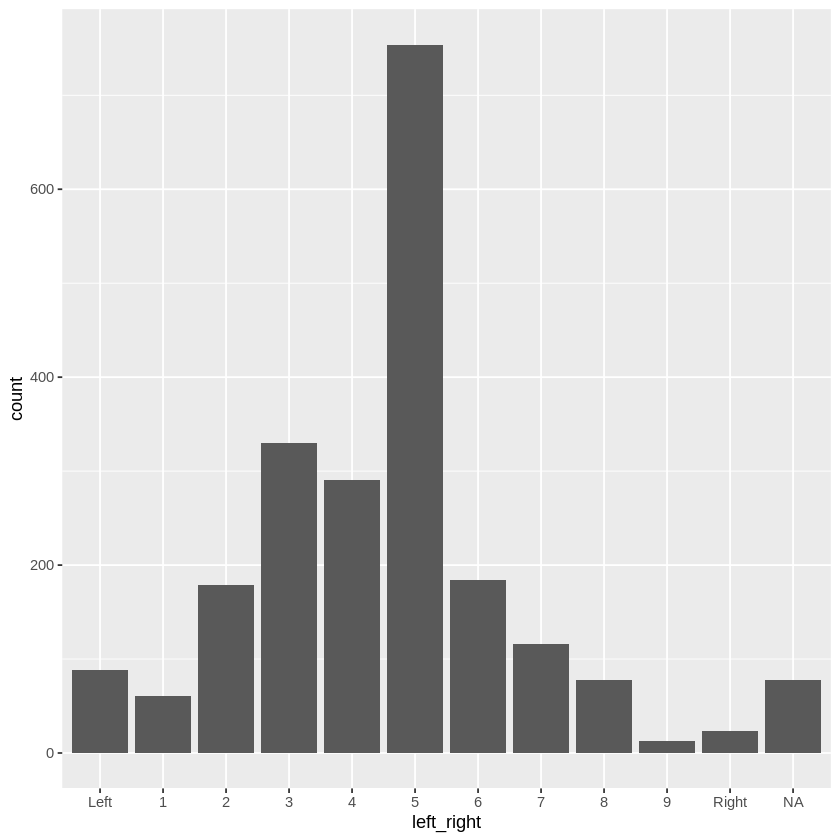

In [16]:
ggplot(data = ess, aes(x = left_right)) +
  geom_bar(stat = "count")

Most people have moderate political views. We can see that the
distribution is slightly more left-skewed, more people tend to have left
views.

### Dependent variable - should gays be free

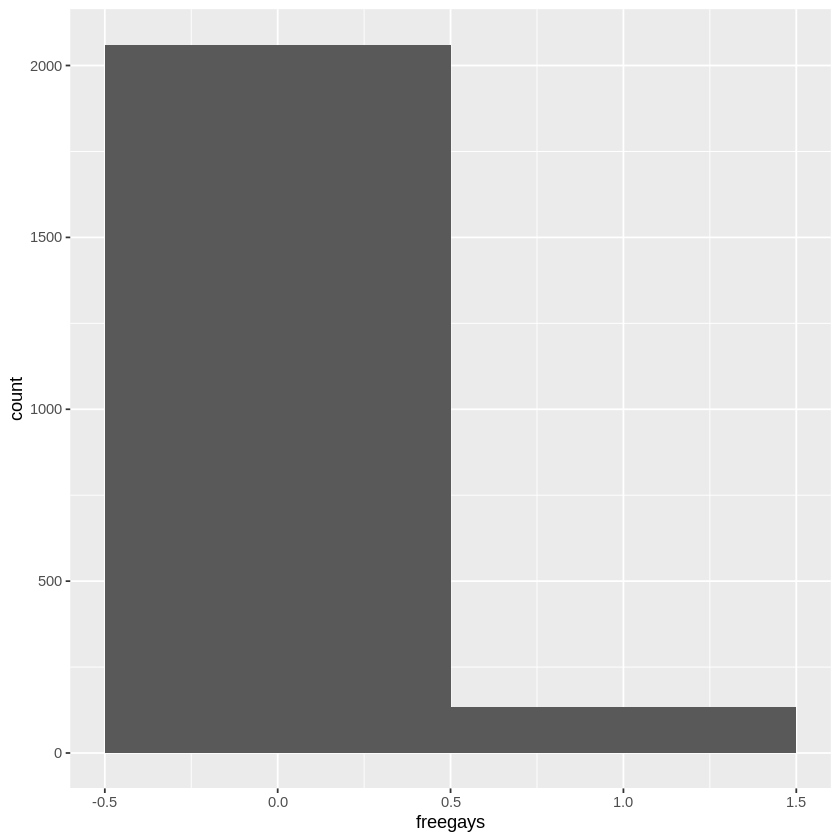

In [17]:
ggplot(data = ess, aes(x = freegays)) +
  geom_histogram(binwidth = 1)

In [18]:
shapiro.test(ess$freegays)


	Shapiro-Wilk normality test

data:  ess$freegays
W = 0.25428, p-value < 2.2e-16


Distribution is not normal for homophobia. Vast majority of people think
that gays and lesbians can live a normal life, and few are of opposite,
homophobic, views.

## Relationships between dependent and independent variables

### Gender and homophobia

In [19]:
leveneTest(ess$freegays ~ ess$gender)

,Df,F value,Pr(>F)
,<int>,<dbl>,<dbl>
group,1,3.294392,0.0696534
,2193,NA,NA


In [20]:
oneway.test(ess$freegays ~ ess$gender, var.equal = T) 


	One-way analysis of means

data:  ess$freegays and ess$gender
F = 3.2944, num df = 1, denom df = 2193, p-value = 0.06965


As ANOVA test shows, the relationship is not very significant for
gender, but we will use gender as our control variable in the model
still, and will check if regression method will show significant
results.

### Age and homophobia

In [21]:
t.test(ess$age, ess$freegays)


	Welch Two Sample t-test

data:  ess$age and ess$freegays
t = 122.15, df = 2192.7, p-value < 2.2e-16
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 48.38615 49.96508
sample estimates:
  mean of x   mean of y 
49.23666211  0.06104784 


T-test results say that relationship is significant, according to
p-value.

### Religion and homophobia

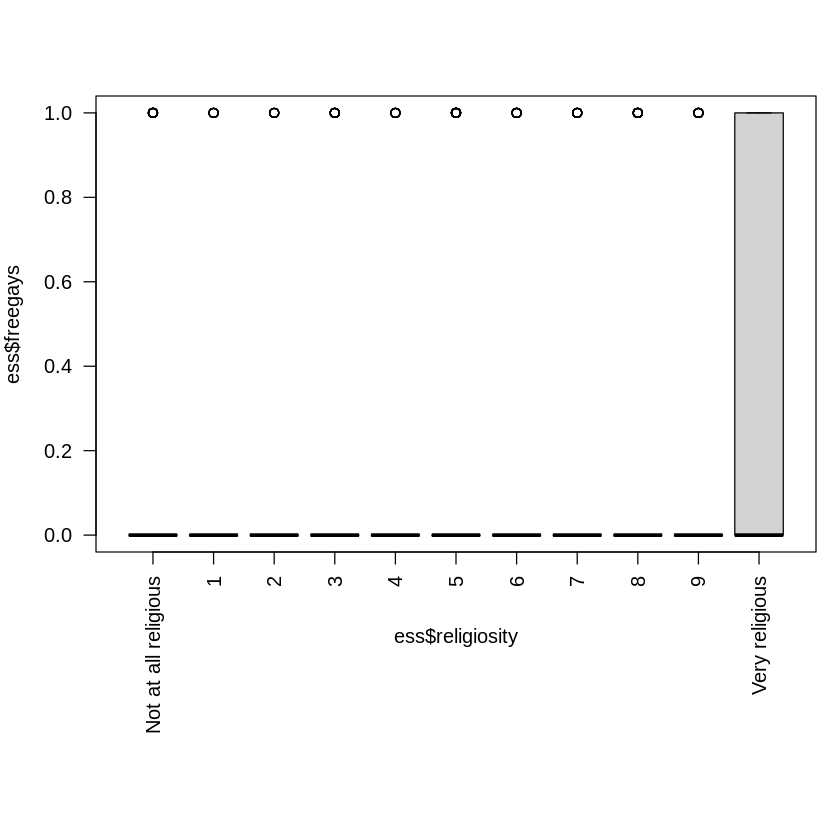

In [22]:
par(mfrow = c(1, 1), mar = c(12, 4, 4, 1))
boxplot(ess$freegays ~ ess$religiosity, las = 2)

In [23]:
t.test(ess$freegays, as.numeric(ess$religiosity))


	Welch Two Sample t-test

data:  ess$freegays and as.numeric(ess$religiosity)
t = -77.087, df = 2217, p-value < 2.2e-16
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -5.159135 -4.903160
sample estimates:
 mean of x  mean of y 
0.06104784 5.09219534 


Judging by boxplot and test, the most religious people tend to be more
negative about gay people living as they wish. The relationship is
significant.

### Education and homophobia

In [24]:
leveneTest(ess$freegays ~ ess$education)

,Df,F value,Pr(>F)
,<int>,<dbl>,<dbl>
group,2,7.069057,0.0008706287
,2186,NA,NA


In [25]:
oneway.test(ess$freegays ~ ess$education, var.equal = T) 


	One-way analysis of means

data:  ess$freegays and ess$education
F = 7.0691, num df = 2, denom df = 2186, p-value = 0.0008706


This relationship also seem significant. The level of education may
predict the level of homophobia and we should use it in the model.

### Left-right scale and homophobia

In [26]:
leveneTest(ess$freegays ~ ess$left_right)

,Df,F value,Pr(>F)
,<int>,<dbl>,<dbl>
group,10,6.498901,5.950296e-10
,2106,NA,NA


In [27]:
oneway.test(ess$freegays ~ ess$left_right, var.equal = T) 


	One-way analysis of means

data:  ess$freegays and ess$left_right
F = 6.4989, num df = 10, denom df = 2106, p-value = 5.95e-10


The position on left - right scale is also significant in relationship
with the dependent variable. It should also be included in our model.

## Model

In [28]:
essfin <- na.omit(ess)
model <- glm(freegays ~  gender + age + religiosity + education + left_right, data = essfin, family = binomial(link = "logit"))

stargazer(model, title="Logit Regression Results",
align=TRUE, dep.var.labels=c("Homophobic attitudes"),
covariate.labels=c("Gender","Age", "Religiosity lvl 1", "Religiosity lvl 2", "Religiosity lvl 3", "Religiosity lvl 4", "Religiosity lvl 5", "Religiosity lvl 6", "Religiosity lvl 7", "Religiosity lvl 8", "Religiosity lvl 9", "Religiosity - Very religious", "Education - Higher","Education - Secondary", "Left-right scale lvl 1", "Left-right scale lvl 2", "Left-right scale lvl 3", "Left-right scale lvl 4", "Left-right scale lvl 5", "Left-right scale lvl 6", "Left-right scale lvl 7", "Left-right scale lvl 8", "Left-right scale lvl 9", "Left-right scale - Right"), omit.stat=c("ser","f"), no.space=TRUE, type = 'text')


Logit Regression Results
                                 Dependent variable:    
                             ---------------------------
                                Homophobic attitudes    
--------------------------------------------------------
Gender                                -0.667***         
                                       (0.209)          
Age                                   0.017***          
                                       (0.005)          
Religiosity lvl 1                      0.831*           
                                       (0.492)          
Religiosity lvl 2                       0.353           
                                       (0.510)          
Religiosity lvl 3                      0.876**          
                                       (0.428)          
Religiosity lvl 4                      0.900*           
                                       (0.471)          
Religiosity lvl 5                       0.627           
     

**Gender**: the log of odds ratio of being homophobic is smaller by 0.67
for females compared to males; women are less likely to be homophobic.

**Age**: the log of odds ratio of being homophobic increases by 0.017
with every year of age; older people are more likely to be more
homophobic.

**Religiosity**: the log of odds ratio is bigger by 0.87 for slightly
religious people (with level 3), by 0.85 for religious people (with
level 8), and by 1.97 and 2.26 for very religious people (level 9 and
Very religious correspondingly) compared to not at all religious ones;
very religious people are more likely to be homophobic.

**Education**: the log of odds ratio is smaller by 1.08 for people with
the higher education, and by 1.15 for people with secondary education,
compared to people with primary education; more educated people are less
likely to be homophobic.

**Left-right political views**: the log of odds ratio is bigger by 1.9
for people with exactly right political views compared to ones with
strictly left views; people with right-wing political views are more
likely to be homophobic.

### Odds ratio


In [29]:
suppressPackageStartupMessages(library(sjPlot))
library(IRdisplay)
display_html(toString(tab_model(model)))


, 
 
   
 freegays 
 
 
 Predictors 
 Odds Ratios 
 CI 
 p 
 
 
 (Intercept) 
 0.05 
 0.01 – 0.15 
 <0.001 
 
 
 gender [Female] 
 0.51 
 0.34 – 0.77 
 0.001 
 
 
 age 
 1.02 
 1.01 – 1.03 
 0.001 
 
 
 religiosity [1] 
 2.30 
 0.83 – 5.89 
 0.091 
 
 
 religiosity [2] 
 1.42 
 0.49 – 3.73 
 0.488 
 
 
 religiosity [3] 
 2.40 
 1.02 – 5.57 
 0.041 
 
 
 religiosity [4] 
 2.46 
 0.94 – 6.09 
 0.056 
 
 
 religiosity [5] 
 1.87 
 0.88 – 4.06 
 0.104 
 
 
 religiosity [6] 
 1.84 
 0.76 – 4.34 
 0.166 
 
 
 religiosity [7] 
 1.17 
 0.45 – 2.88 
 0.729 
 
 
 religiosity [8] 
 2.36 
 1.03 – 5.40 
 0.040 
 
 
 religiosity [9] 
 7.22 
 2.75 – 18.36 
 <0.001 
 
 
 religiosity [Very religious] 
 9.60 
 4.23 – 22.21 
 <0.001 
 
 
 education [higher] 
 0.34 
 0.18 – 0.63 
 0.001 
 
 
 education [secondary] 
 0.32 
 0.19 – 0.54 
 <0.001 
 
 
 left right [1] 
 0.53 
 0.07 – 2.62 
 0.461 
 
 
 left right [2] 
 0.45 
 0.12 – 1.70 
 0.227 
 
 
 left right [3] 
 0.63 
 0.23 – 2.04 
 0.403 
 
 
 left right [4] 
 0.86 
 0.31 – 2.77 
 0.782 
 
 
 left right [5] 
 0.89 
 0.37 – 2.67 
 0.816 
 
 
 left right [6] 
 0.34 
 0.09 – 1.29 
 0.104 
 
 
 left right [7] 
 1.28 
 0.43 – 4.30 
 0.671 
 
 
 left right [8] 
 1.12 
 0.31 – 4.17 
 0.861 
 
 
 left right [9] 
 0.89 
 0.11 – 5.19 
 0.899 
 
 
 left right [Right] 
 6.73 
 1.85 – 26.68 
 0.004 
 
 
 Observations 
 2109 
 
 
 R 2 Tjur 
 0.076 
 

 
, 
 
 

 
 
 
 
   
 freegays 
 
 
 Predictors 
 Odds Ratios 
 CI 
 p 
 
 
 (Intercept) 
 0.05 
 0.01 – 0.15 
 <0.001 
 
 
 gender [Female] 
 0.51 
 0.34 – 0.77 
 0.001 
 
 
 age 
 1.02 
 1.01 – 1.03 
 0.001 
 
 
 religiosity [1] 
 2.30 
 0.83 – 5.89 
 0.091 
 
 
 religiosity [2] 
 1.42 
 0.49 – 3.73 
 0.488 
 
 
 religiosity [3] 
 2.40 
 1.02 – 5.57 
 0.041 
 
 
 religiosity [4] 
 2.46 
 0.94 – 6.09 
 0.056 
 
 
 religiosity [5] 
 1.87 
 0.88 – 4.06 
 0.104 
 
 
 religiosity [6] 
 1.84 
 0.76 – 4.34 
 0.166 
 
 
 religiosity [7] 
 1.17 
 0.45 – 2.88 
 0.729 
 
 
 religiosity [8] 
 2.36 
 1.03 – 5.40 
 0.040 
 
 
 religiosity [9] 
 7.22 
 2.75 – 18.36 
 <0.001 
 
 
 religiosity [Very religious] 
 9.60 
 4.23 – 22.21 
 <0.001 
 
 
 education [higher] 
 0.34 
 0.18 – 0.63 
 0.001 
 
 
 education [secondary] 
 0.32 
 0.19 – 0.54 
 <0.001 
 
 
 left right [1] 
 0.53 
 0.07 – 2.62 
 0.461 
 
 
 left right [2] 
 0.45 
 0.12 – 1.70 
 0.227 
 
 
 left right [3] 
 0.63 
 0.23 – 2.04 
 0.403 
 
 
 left right [4] 
 0.86 
 0.31 – 2.77 
 0.782 
 
 
 left right [5] 
 0.89 
 0.37 – 2.67 
 0.816 
 
 
 left right [6] 
 0.34 
 0.09 – 1.29 
 0.104 
 
 
 left right [7] 
 1.28 
 0.43 – 4.30 
 0.671 
 
 
 left right [8] 
 1.12 
 0.31 – 4.17 
 0.861 
 
 
 left right [9] 
 0.89 
 0.11 – 5.19 
 0.899 
 
 
 left right [Right] 
 6.73 
 1.85 – 26.68 
 0.004 
 
 
 Observations 
 2109 
 
 
 R 2 Tjur 
 0.076 
 

 

 , 
 
   
 freegays 
 
 
 Predictors 
 Odds Ratios 
 CI 
 p 
 
 
 (Intercept) 
 0.05 
 0.01 – 0.15 
 <0.001 
 
 
 gender [Female] 
 0.51 
 0.34 – 0.77 
 0.001 
 
 
 age 
 1.02 
 1.01 – 1.03 
 0.001 
 
 
 religiosity [1] 
 2.30 
 0.83 – 5.89 
 0.091 
 
 
 religiosity [2] 
 1.42 
 0.49 – 3.73 
 0.488 
 
 
 religiosity [3] 
 2.40 
 1.02 – 5.57 
 0.041 
 
 
 religiosity [4] 
 2.46 
 0.94 – 6.09 
 0.056 
 
 
 religiosity [5] 
 1.87 
 0.88 – 4.06 
 0.104 
 
 
 religiosity [6] 
 1.84 
 0.76 – 4.34 
 0.166 
 
 
 religiosity [7] 
 1.17 
 0.45 – 2.88 
 0.729 
 
 
 religiosity [8] 
 2.36 
 1.03 – 5.40 
 0.040 
 
 
 religiosity [9] 
 7.22 
 2.75 – 18.36 
 <0.001 
 
 
 religiosity [Very religious] 
 9.60 
 4.23 – 22.21 
 <0.001 
 
 
 education [higher] 
 0.34 
 0.18 – 0.63 
 0.001 
 
 
 education [secondary] 
 0.32 
 0.19 – 0.54 
 <0.001 
 
 
 left right [1] 
 0.53 
 0.07 – 2.62 
 0.461 
 
 
 left right [2] 
 0.45 
 0.12 – 1.70 
 0.227 
 
 
 left right [3] 
 0.63 
 0.23 – 2.04 
 0.403 
 
 
 left right [4] 
 0.86 
 0.31 – 2.77 
 0.782 
 
 
 left right [5] 
 0.89 
 0.37 – 2.67 
 0.816 
 
 
 left right [6] 
 0.34 
 0.09 – 1.29 
 0.104 
 
 
 left right [7] 
 1.28 
 0.43 – 4.30 
 0.671 
 
 
 lef

**Gender**: the odds of being homophobic decrease by 49% for females
compared to males.

**Age**: the odds of being homophobic increase by 2% with every year of
age.

**Religiosity**: the odds of being homophobic increase by 140% for
slightly religious people (with level 3), increase by 136% for religious
people (with level 8), and increase by 622% and 860% for very religious
people (level 9 and Very religious correspondingly) compared to not at
all religious ones.

**Education**: the odds of being homophobic decrease by 66% for people
with the higher education, and by 68% for people with secondary
education, compared to people with primary education.

**Left-right political views**: the odds of being homophobic increase by
573% for people with exactly right political views compared to ones with
strictly left views.

In [30]:
library(margins)
margins <- data.frame(summary(margins(model)))
stargazer(margins, title="Margins of the model",
align=TRUE, summary = F, dep.var.labels=c("Homophobic attitudes"), no.space=TRUE, type = 'text')


Margins of the model
            factor            AME     SE     z      p    lower  upper 
----------------------------------------------------------------------
1             age            0.001  0.0003 3.176  0.001  0.0003 0.001 
2       educationhigher      -0.077 0.025  -3.012 0.003  -0.127 -0.027
3     educationsecondary     -0.080 0.024  -3.295 0.001  -0.127 -0.032
4        genderFemale        -0.033 0.010  -3.228 0.001  -0.052 -0.013
5         left_right1        -0.030 0.038  -0.786 0.432  -0.104 0.044 
6         left_right2        -0.035 0.031  -1.113 0.266  -0.096 0.027 
7         left_right3        -0.023 0.030  -0.753 0.451  -0.082 0.036 
8         left_right4        -0.008 0.031  -0.268 0.789  -0.070 0.053 
9         left_right5        -0.007 0.029  -0.224 0.823  -0.064 0.051 
10        left_right6        -0.042 0.030  -1.407 0.159  -0.101 0.017 
11        left_right7        0.016  0.037  0.436  0.663  -0.056 0.088 
12        left_right8        0.007  0.040  0.175  0.861

**Gender**: on average the probability of being homophobic is greater by
0.03 for females.

**Age**: on average the probability of being homophobic increases by
0.0008 with every year of age.

**Religiosity**: on average the probability of being homophobic is
greater by 0.036 for slightly religious people (with level 3), by 0.035
for religious people (with level 8), and by 0.136 and 0.176 for very
religious people (level 9 and Very religious correspondingly) compared
to not at all religious ones.

**Education**: on average the probability of being homophobic is smaller
by 0.077 for people with the higher education, and by 0.8 for people
with secondary education, compared to people with primary education.

**Left-right political views**: on average the probability of being
homophobic is bigger by 0.23 for people with exactly right political
views compared to ones with strictly left views.

### Model fit

In [31]:
suppressPackageStartupMessages(library(pscl))
hitmiss(model)

Classification Threshold = 0.5 
        y=0 y=1
yhat=0 1982 118
yhat=1    6   3
Percent Correctly Predicted = 94.12%
Percent Correctly Predicted = 99.7%, for y = 0
Percent Correctly Predicted = 2.479%  for y = 1
Null Model Correctly Predicts 94.26%


[1] 94.120436 99.698189  2.479339

The model correctly predicts 94% of the data. However, non-homophobic
people are correctly predicted in 99.7% of cases, while homophobes are
correctly predicted in only 2.48%, which means that out model fails to
predict homophobic people. It is probably because there are very few
homophobic people in the sample compared to non-homophobic.

In [32]:
suppressPackageStartupMessages(library(DescTools))
PseudoR2(model)

McFadden 
0.1176088

Our model explains about 11% of the data, which is not a perfect fit.

## Conclusion

Our model is not perfect, but it showed significant results. Consistent
with the literature, the model showed that people that are most
religious, people with right-wing political views, and people with
education lower than secondary are more likely to be homophobic.

## References

1.  Basow, S.A., Johnson, K. Predictors of Homophobia in Female College
    Students. Sex Roles 42, 391–404 (2000).
    <https://doi.org/10.1023/A:1007098221316>

2.  Nagoshi J. L. et al. Gender differences in correlates of homophobia
    and transphobia //Sex roles. – 2008. – Т. 59. – №. 7. – С. 521-531.

3.  Julianne Ohlander; Jeanne Batalova; Judith Treas (2005). Explaining
    educational influences on attitudes toward homosexual relations. ,
    34(4), 781–799. <doi:10.1016/j.ssresearch.2004.12.004>

4.  Ying, Xie; Minggang, Peng (2017). Attitudes towards Homosexuality in
    China: Exploring the Effects of Religion, Modernizing Factors, and
    Traditional Culture. Journal of Homosexuality.
    <doi:10.1080/00918369.2017.1386025>
